# Identity

Name : Gabriel Reyes

Batch : FTDS-004

**Objective**

Do a modelling based on the given dataset to predict **price** value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

#model
from sklearn.linear_model import LinearRegression

#evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

#save model
import joblib


# Data Loading & Overview

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df = pd.DataFrame(df)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

A. Checking for duplicated data

In [4]:
df.duplicated().sum().sum()

0

> There is **no duplicated data**

B. Checking for null value/ missing data

In [5]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

There are missing values in the price columns, we will handle the column in the Data Cleaning section

C. Checking the describe() of the numerical and categorical data

In [6]:
num_col = list(df.select_dtypes(include=['int64','float64']))
cat_col = list(df.select_dtypes(exclude=['int64','float64','datetime64[ns]']))

In [7]:
# Checking the numerical column
df[num_col].describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [8]:
# Checking the categorical column
df[cat_col].describe()

,id,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,693071,58857,58851,385663,55096,55096,218895,202340,218895


Checking the cab_type and the predict_id unique value, which may give us insights regarding the classification of the ride-hailing provider offered in this data.

In [9]:
# Checking the arrangement of the cab_type , product_id, and name
df.groupby(['cab_type','product_id'])['name'].value_counts()

cab_type  product_id                            name        
Lyft      lyft                                  Lyft            51235
          lyft_line                             Shared          51233
          lyft_lux                              Lux Black       51235
          lyft_luxsuv                           Lux Black XL    51235
          lyft_plus                             Lyft XL         51235
          lyft_premier                          Lux             51235
Uber      55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX           55094
          6c84fd89-3f11-4782-9b50-97c468b19529  Black           55095
          6d318bcc-22a3-4af6-bddd-b409bfce1546  Black SUV       55096
          6f72dfc5-27f1-42e8-84db-ccc7a75f6969  UberXL          55096
          8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi            55095
          997acbb5-e102-41e1-b155-9df7de0a73f2  UberPool        55091
          9a0e7b09-b92b-4c41-9779-2ad22b4d779d  WAV             55096
Name: name, dtype: int64

There are 2 cab_type within this dataset, Lyft & Uber:

Each cab_type has its own product_id that defines the service level provided for the customer

# Data Cleaning

In [10]:
# Creating a copy df files named df_cleaned
df_cleaned = df.copy()
df_cleaned.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## EDA

In [11]:
# Defining the categorical and numerical column
num_col = list(df_cleaned.select_dtypes(include=['int64','float64']))
cat_col = list(df_cleaned.select_dtypes(exclude=['int64','float64','datetime64[ns]']))

C:\Users\appsg\AppData\Local\Temp\ipykernel_24496\716610721.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cleaned.corr()


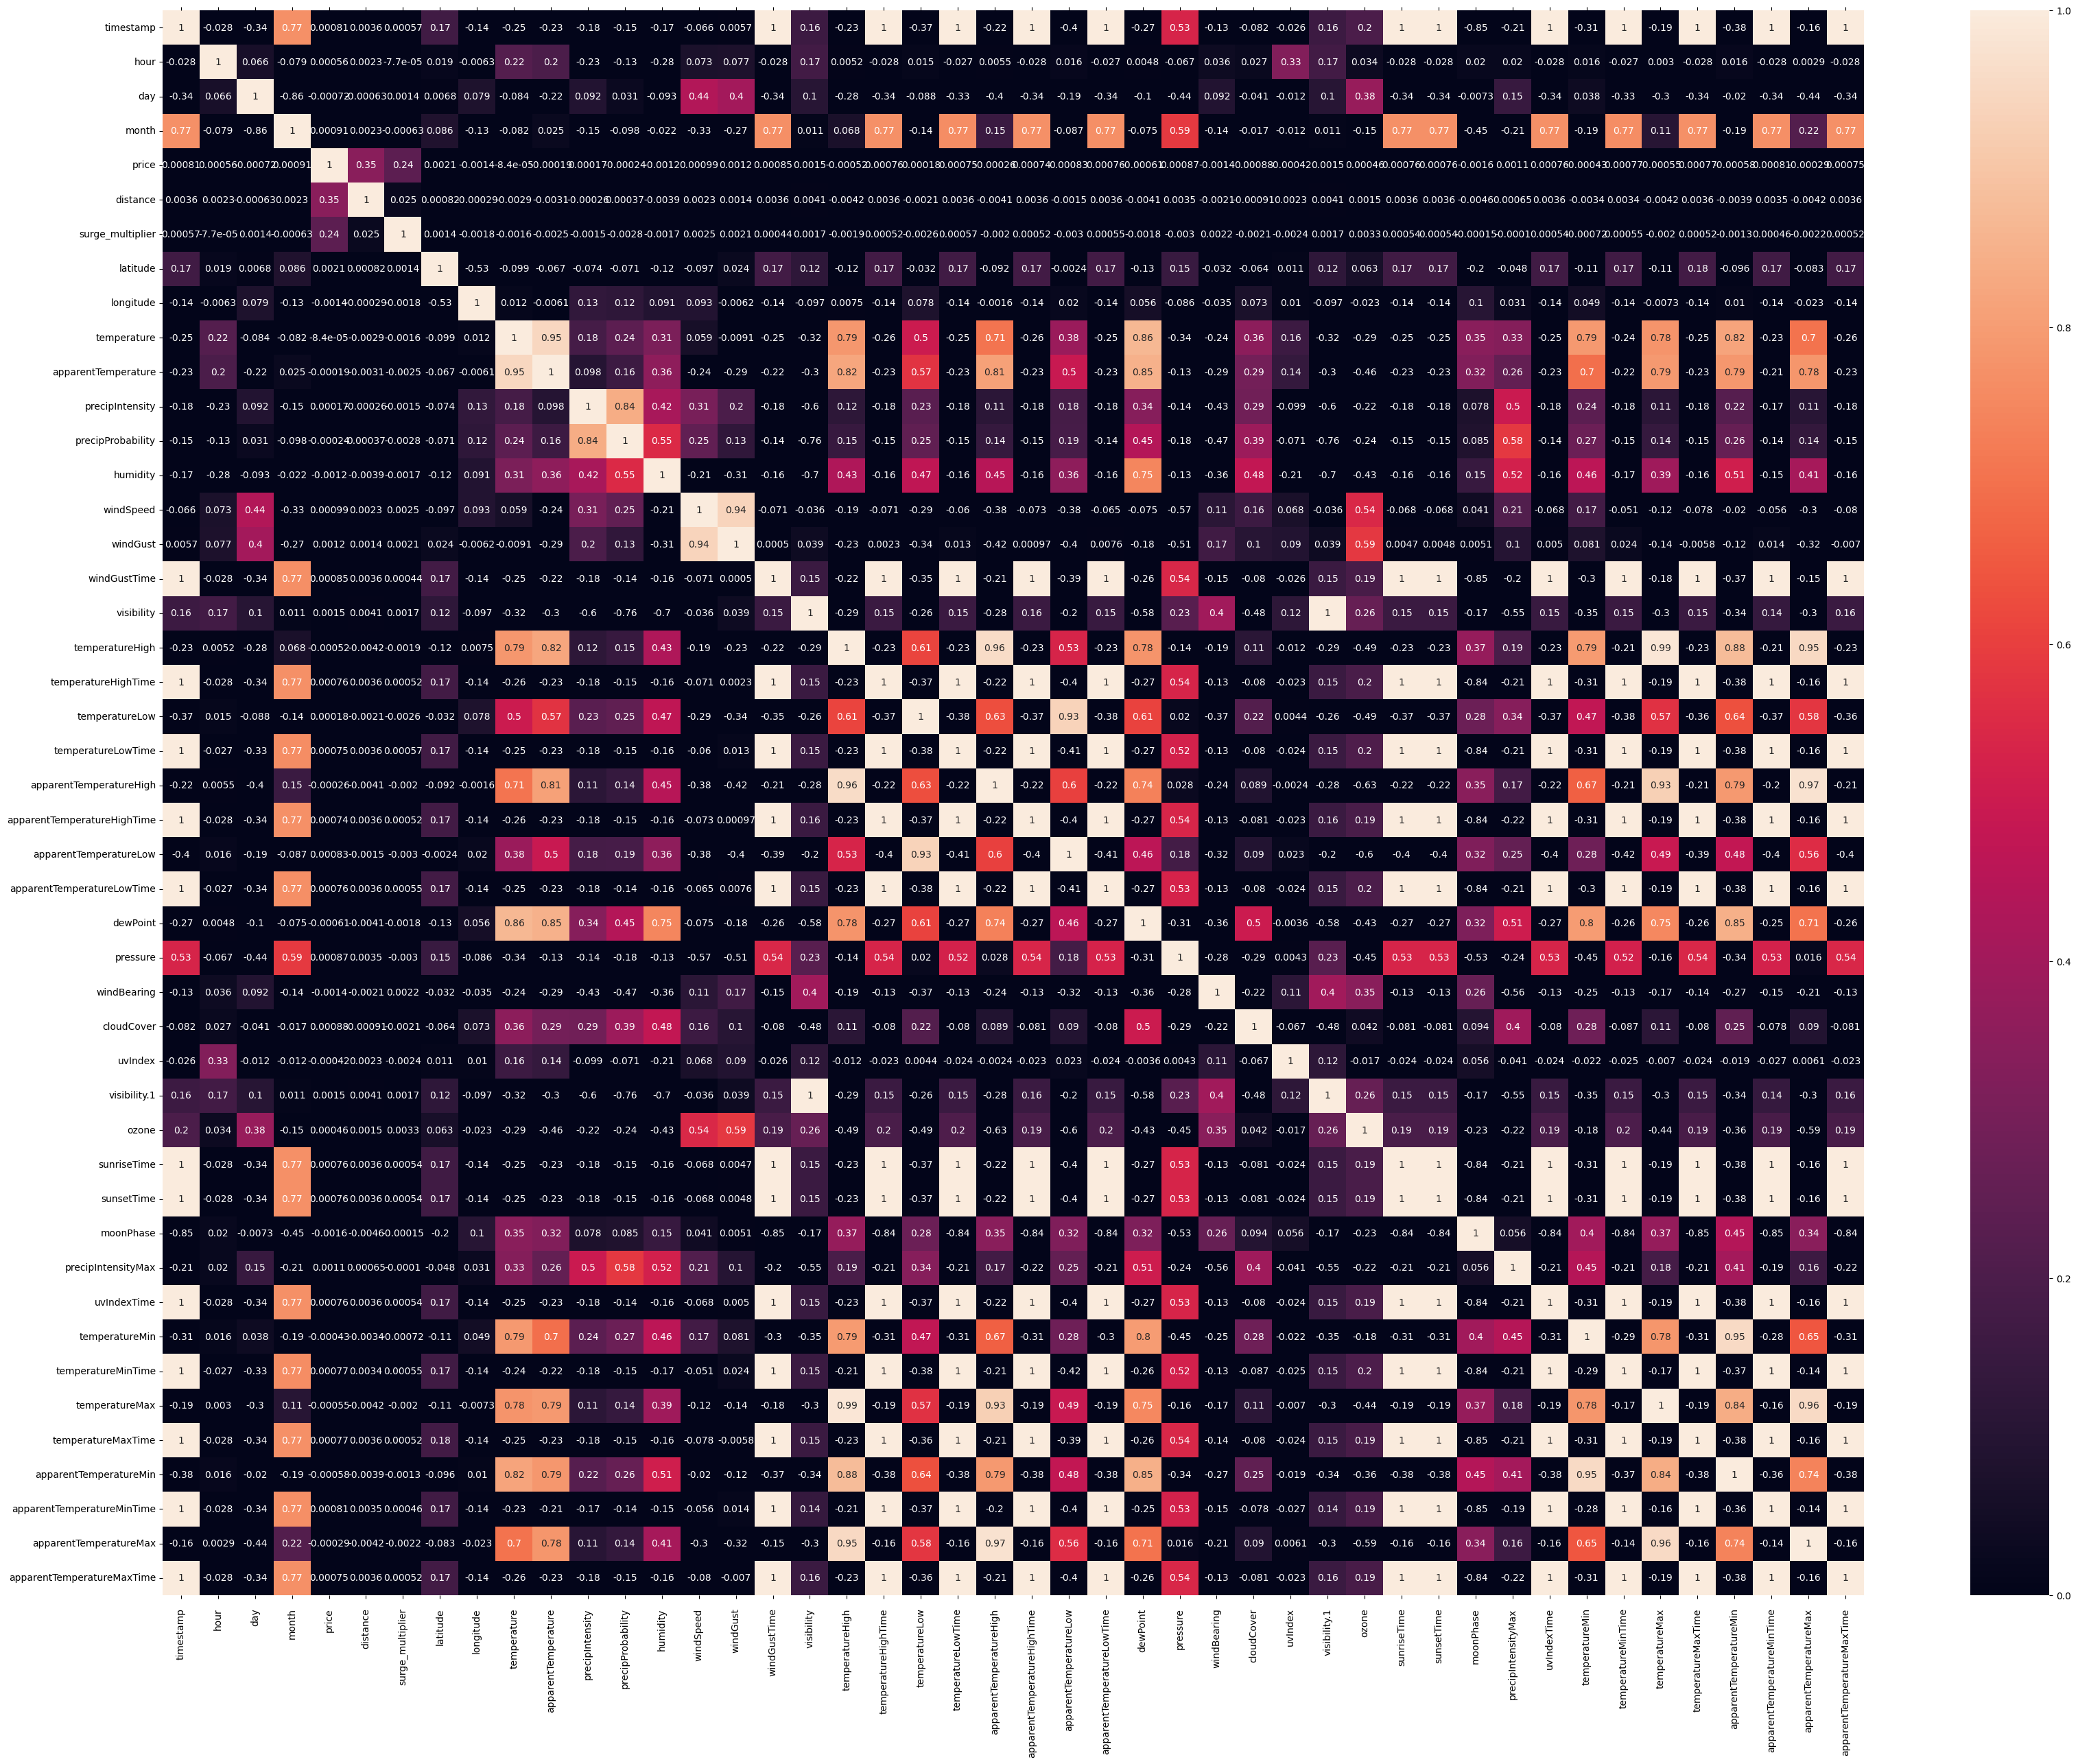

In [12]:
# Checking the Data Correlation using the Correlation heatmap

corr = df_cleaned.corr()

plt.figure(figsize=(40,30))
corr_heat = sns.heatmap(corr, annot=True, vmin=0, vmax=1)
corr_heat.tick_params(axis='x', which='both', pad=10, labelrotation=90, top=True)
plt.show()

We found out that there several numerical columns that may we dropped, since its existence doesn't affect the price in a major way.

They are :

'id','timestamp','hour','day','month','timezone','latitude','longitude','windGustTime','apparentTemperature',
'temperatureHighTime','temperatureLowTime','apparentTemperatureHighTime','apparentTemperatureLowTime',
'sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime',
'apparentTemperatureMinTime','apparentTemperatureMaxTime','temperatureHigh','temperatureLow',
'apparentTemperatureHigh','apparentTemperatureLow','temperatureMin','temperatureMax',
'apparentTemperatureMin','apparentTemperatureMax','windSpeed','visibility.1',
'precipIntensityMax','precipProbability','uvIndex','dewPoint','ozone','moonPhase',
'windBearing','windBearing','pressure'

In [13]:
# Dropping Col_1
col_drop1 = ['id','datetime','timestamp','day','month','timezone','latitude','longitude','windGustTime','apparentTemperature',
             'temperatureHighTime','temperatureLowTime','apparentTemperatureHighTime','apparentTemperatureLowTime',
             'sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime',
             'apparentTemperatureMinTime','apparentTemperatureMaxTime','temperatureHigh','temperatureLow',
             'apparentTemperatureHigh','apparentTemperatureLow','temperatureMin','temperatureMax',
             'apparentTemperatureMin','apparentTemperatureMax','windSpeed','visibility.1',
             'precipIntensityMax','precipProbability','uvIndex','dewPoint','ozone','moonPhase',
             'windBearing','windBearing','pressure','cloudCover','precipIntensity','humidity',
             'windGust','source','destination','long_summary','visibility','temperature']
df_cleaned = df_cleaned.drop(col_drop1, axis=1)

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              693071 non-null  int64  
 1   cab_type          693071 non-null  object 
 2   product_id        693071 non-null  object 
 3   name              693071 non-null  object 
 4   price             637976 non-null  float64
 5   distance          693071 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   short_summary     693071 non-null  object 
 8   icon              693071 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 47.6+ MB


The amount of columns is reduced from 57 columns to 8 columns. 

49 numerical columns is reduced.

Changing the value of the categorical column

In [15]:
cat_col = list(df_cleaned.select_dtypes(exclude=['int64','float64','datetime64[ns]']))

for i in df_cleaned[cat_col].columns:
    print(f'{i} unique value amount : {len(df_cleaned[i].unique())}')

cab_type unique value amount : 2
product_id unique value amount : 13
name unique value amount : 13
short_summary unique value amount : 9
icon unique value amount : 7


Check each unique value in each categorical column

In [16]:
for i in df_cleaned[cat_col].columns:
    print(i)
    print(df_cleaned[i].value_counts())
    print('\n')

cab_type
Uber    385663
Lyft    307408
Name: cab_type, dtype: int64


product_id
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64


name
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          512

There are several conclusions could be made from this findings : 

1. For the **short summary** and **icon** column, the values will be grouped into its intensity :

    **short_summary**
    >   Rain = Rain

    >   Semi-Rain = Light Rain, Drizzle

    >   Not Rain = Possible Drizzle, Overcast, Mostly Cloudy, Partly Cloudy, Clear
    
    **icon**
    >   Rain = Rain

    >   Semi-cloudy = Cloudy, Partly-cloudy-day, Partly-cloudy-night, Fog
    
    >   Clear = Clear-day, Clear-night 

In [17]:
# Create a mapping which will group the result in both short_summary and icon column
short_summary_mapping = {
    'Rain': 'Rain',
   'Light Rain': 'Semi-Rain', 
   'Drizzle': 'Semi-Rain',
    'Possible Drizzle':'Not-Rain',
    'Overcast':'Not-Rain',
    'Mostly Cloudy':'Not-Rain',
    'Partly Cloudy':'Not-Rain',
    'Clear':'Not-Rain',
    'Foggy':'Not-Rain'
}
icon_mapping = {
    'Rain':'rain',
    'cloudy':'Cloudy', 
    'partly-cloudy-day': 'Cloudy',
    'partly-cloudy-night': 'Cloudy',
    'fog':'Cloudy',
    'clear-day':'Clear',
    'clear-night':'Clear'
}

# Remove Leading/trailing whitespaces from both short_summary & icon
df_cleaned['short_summary'] = df_cleaned['short_summary'].str.strip()
df_cleaned['icon'] = df_cleaned['icon'].str.strip()

# Creating new columns of the newly replaced mapping
df_cleaned['group_short_summary'] = df_cleaned['short_summary'].replace(short_summary_mapping)
df_cleaned['group_icon'] = df_cleaned['icon'].replace(icon_mapping)

# Print the dataframe
df_cleaned[['group_short_summary','group_icon']].head()

,group_short_summary,group_icon
0,Not-Rain,Cloudy
1,Rain,rain
2,Not-Rain,Clear
3,Not-Rain,Clear
4,Not-Rain,Cloudy


In [18]:
# Using phi-matrix to check the correlation of the categorical and the numerical features
df_cleaned.phik_matrix().loc['price'].sort_values(ascending=False)

interval columns not set, guessing: ['hour', 'price', 'distance', 'surge_multiplier']


price                  1.000000
product_id             0.677871
name                   0.677871
distance               0.430955
surge_multiplier       0.357838
cab_type               0.148165
hour                   0.000000
short_summary          0.000000
icon                   0.000000
group_short_summary    0.000000
group_icon             0.000000
Name: price, dtype: float64

Based on this result, we will use top 3 most affecting column to the price:

1. product_id
2. distance
3. surge_multiplier

The cab_type is having a one-on-one condition with its product_id, so then there is no use of using the cab_type into consideration

In [19]:
df_cleaned = df_cleaned[['product_id','distance','surge_multiplier','price']]
df_cleaned.head()

,product_id,distance,surge_multiplier,price
0,lyft_line,0.44,1.0,5.0
1,lyft_premier,0.44,1.0,11.0
2,lyft,0.44,1.0,7.0
3,lyft_luxsuv,0.44,1.0,26.0
4,lyft_plus,0.44,1.0,9.0


Multicollinearity Test

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
X = df_cleaned.loc[:,['distance','surge_multiplier']]
calc_vif(X)

,variables,VIF
0,distance,4.597022
1,surge_multiplier,4.597022


Based on the result above, the VIF value is 4.597, and we can say that this VIF value indicates a low multicollinearity (VIF< 10)

##### *Splitting data into data train and data test*

In [22]:
# We use 'price' as the target
x = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=242)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(554456, 3)
(138615, 3)
(554456,)
(138615,)


Do checking for the Outlier value in tha Train dataset.

But, we will merge the train dataset first in order the easened the outlier handling wihtin the train dataset.

In [24]:
# Merging the train dataset into 1 dataset
df_train_merged = pd.concat([X_train, y_train], axis=1)
df_train_merged.head()

,product_id,distance,surge_multiplier,price
644474,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,1.41,1.00,15.0
587970,lyft_plus,2.02,1.75,26.0
262037,6c84fd89-3f11-4782-9b50-97c468b19529,3.05,1.00,22.5
401615,lyft,3.95,1.00,13.5
587010,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0.88,1.00,10.5


### Handling the Missing Value in the Numerical Value in df_train_merged

In [25]:
df_train_merged.isna().sum()

product_id              0
distance                0
surge_multiplier        0
price               44017
dtype: int64

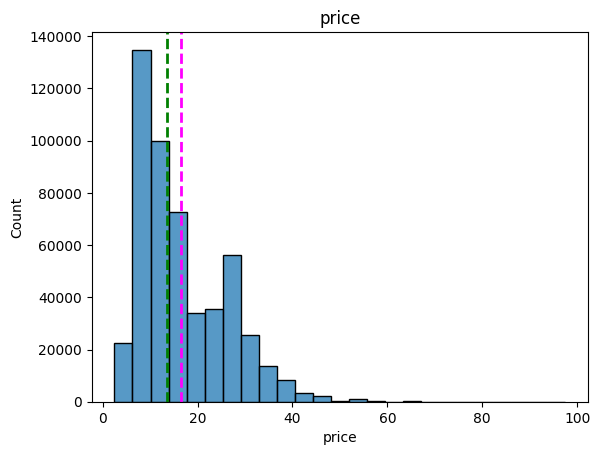

Skewness value is : 1.047761705913187


In [26]:
# Visualizing the distribution of the price column in Histoplot
sns.histplot(df_train_merged['price'], bins=25)
plt.axvline(df_train_merged['price'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_train_merged['price'].median(), color='green', linestyle='dashed', linewidth=2)
plt.title(str('price'))

plt.show()
print(f'Skewness value is : {df_train_merged["price"].skew()}')

Since the the distribution of the Price is right-skewed and it pulls the mean value to the right, I will fill the null value with the median value

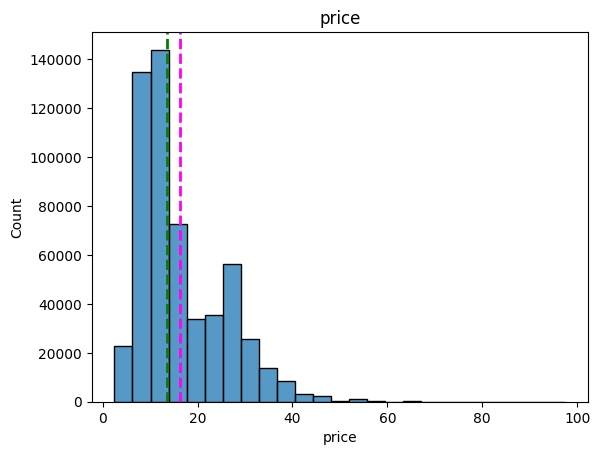

Skewness value is : 1.1559000390346252


In [27]:
# Filling the missing value with its median value
df_train_merged["price"] = df_train_merged["price"].fillna(df_train_merged["price"].median())

# Visualizing the distribution of the price column in Histoplot
sns.histplot(df_train_merged['price'], bins=25)
plt.axvline(df_train_merged['price'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_train_merged['price'].median(), color='green', linestyle='dashed', linewidth=2)
plt.title(str('price'))

plt.show()
print(f'Skewness value is : {df_train_merged["price"].skew()}')

### Handling the Outlier in the Numerical Value in df_train_merged

In [28]:
num_col_train = ['distance', 'surge_multiplier', 'price']

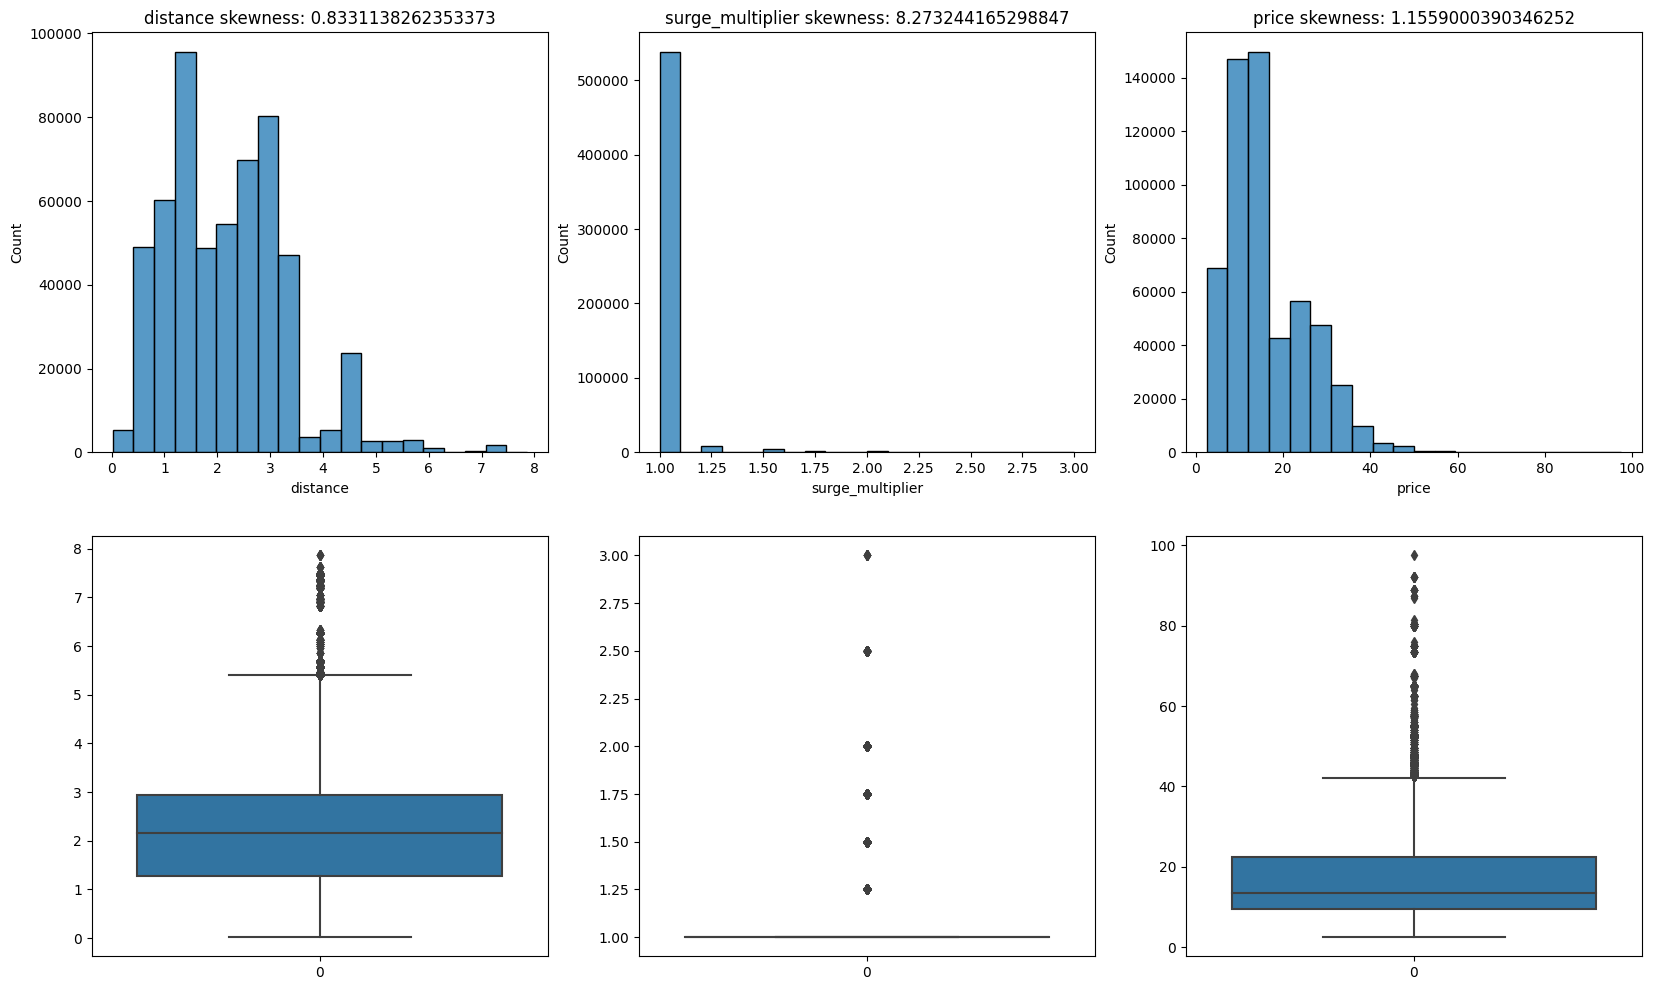

In [29]:
# Creating Histogram and Boxplot for each num_col in df_train_merged
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[20, 12])
ax = ax.flatten()
for i,j in enumerate(num_col_train) :
    # Histogram
    sns.histplot(df_train_merged[j], bins=20, ax=ax[i])
    ax[i].set_title(f'{j} skewness: {df_train_merged[j].skew()}')
    # Boxplot
    sns.boxplot(df_train_merged[j], ax=ax[i+3])
    
plt.show()



From this plot, we find that :

1. Though the *surge multiplier* is a numerical value, but its value is representing the category of the surge multiplier
2. There are several outlier values in **distance** that need to be checked further
3. The **price** is having an outlier value, we will handle it as well

## Outlier handling

In [30]:
def outlier_detect(dataset, column, distance=1.5):
    # Check skewness level
    print(f'Skewness level : {dataset[column].skew()}')
    # Check the IQR
    iqr = dataset[column].quantile(0.75)-dataset[column].quantile(0.25)
    iqr_multiplier = iqr*distance
    # Yielding the Upper & Lower Threshold
    upper_threshold = dataset[column].quantile(0.75) + iqr_multiplier
    lower_threshold = dataset[column].quantile(0.25) - iqr_multiplier
    # Considered Data Outlier
    outlier = dataset[(dataset[column] > upper_threshold) | (dataset[column] < lower_threshold)]
    # Check the amount of the outlier data
    print(f'Total data : {len(dataset[column])}')

    print(f'Data considered as outlier : {len(outlier)}')

    print(f'Percentage considered as outlier : {(len(outlier)/len(dataset[column]))*100}')

    return(upper_threshold, lower_threshold)

In [31]:
df_train_merged.describe()

,distance,surge_multiplier,price
count,554456.000000,554456.000000,554456.000000
mean,2.189648,1.013929,16.301387
std,1.139090,0.091717,8.984224
min,0.020000,1.000000,2.500000
25%,1.280000,1.000000,9.500000
50%,2.160000,1.000000,13.500000
75%,2.930000,1.000000,22.500000
max,7.860000,3.000000,97.500000


Outlier handling in **distance** column

In [32]:
# Detect Outlier for the Distance Column
outlier_detect(df_train_merged, 'distance',1.5)

Skewness level : 0.8331138262353373
Total data : 554456
Data considered as outlier : 6614
Percentage considered as outlier : 1.1928809499761928


(5.405, -1.195)

The amount of considered as outlier from the **distance** column is only 0.03% of the total dataset, so then we will trim the rows of data which having the outlier value

In [33]:
# Trimming the outlier value from the distance Column
df_train_merged = df_train_merged[(df_train_merged['distance'] <= 5.405 ) & (df_train_merged['distance'] >= -1.195)]

Outlier handling in **price** column

----

In [34]:
# Detect Outlier for the Distance Column
outlier_detect(df_train_merged, 'price',1.5)

Skewness level : 1.1373442223033392
Total data : 547842
Data considered as outlier : 5512
Percentage considered as outlier : 1.0061295044921712


(42.0, -10.0)

The amount of data that is considered as the outlier from **price** columns is only weighted 0.66% out of total data. The data will be trimmed with this setting

In [35]:
# Trimming the outlier value from the distance Column
df_train_merged = df_train_merged[(df_train_merged['distance'] <= 42 ) & (df_train_merged['distance'] >= -11.25)]

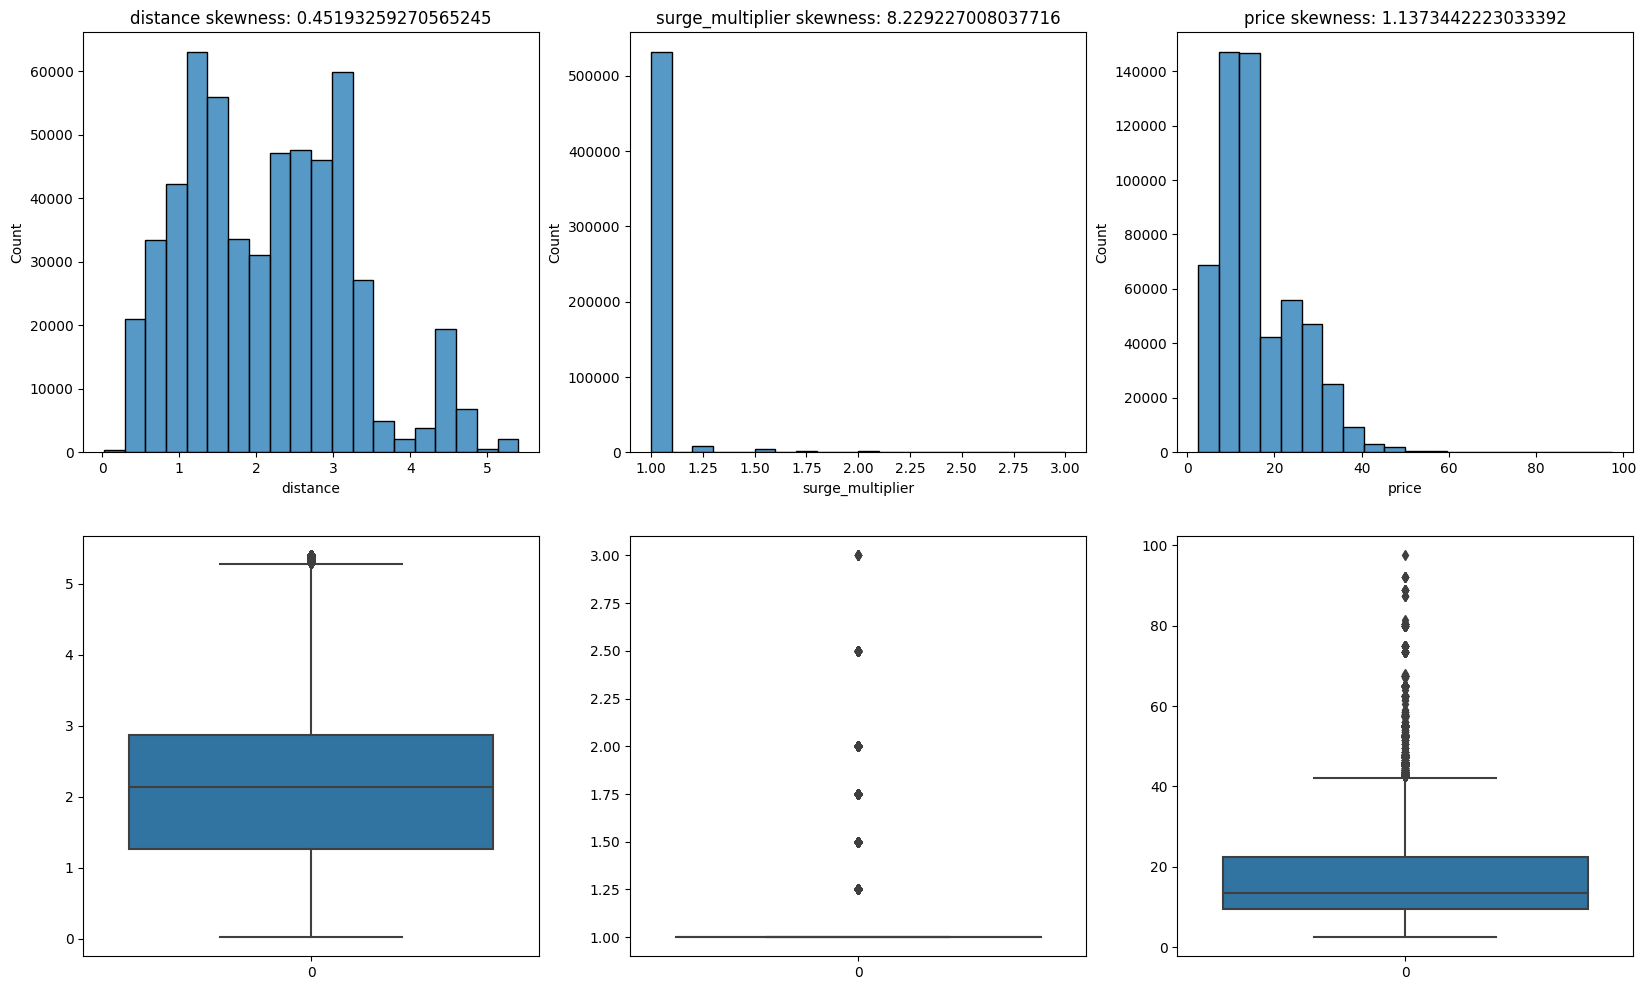

In [36]:
# Creating Histogram and Boxplot for each num_col in df_train_merged
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[20, 12])
ax = ax.flatten()
for i,j in enumerate(num_col_train) :
    # Histogram
    sns.histplot(df_train_merged[j], bins=20, ax=ax[i])
    ax[i].set_title(f'{j} skewness: {df_train_merged[j].skew()}')
    # Boxplot
    sns.boxplot(df_train_merged[j], ax=ax[i+3])
    
plt.show()

**Ordinal Encoding for surge_multiplier**

In [37]:
df_train_merged.head()

,product_id,distance,surge_multiplier,price
644474,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,1.41,1.00,15.0
587970,lyft_plus,2.02,1.75,26.0
262037,6c84fd89-3f11-4782-9b50-97c468b19529,3.05,1.00,22.5
401615,lyft,3.95,1.00,13.5
587010,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0.88,1.00,10.5


In [38]:
# Copying the df_train_merged dataset into df_cat_ordinal 
df_cat_ordinal = df_train_merged.copy()
df_cat_ordinal.head()

,product_id,distance,surge_multiplier,price
644474,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,1.41,1.00,15.0
587970,lyft_plus,2.02,1.75,26.0
262037,6c84fd89-3f11-4782-9b50-97c468b19529,3.05,1.00,22.5
401615,lyft,3.95,1.00,13.5
587010,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0.88,1.00,10.5


In [39]:
print(df_cat_ordinal['surge_multiplier'].unique())
print(df_cat_ordinal['surge_multiplier'].value_counts())

[1.   1.75 1.25 1.5  2.   2.5  3.  ]
1.00    531005
1.25      8895
1.50      4078
1.75      1937
2.00      1801
2.50       118
3.00         8
Name: surge_multiplier, dtype: int64


In [40]:
# Hierarchy of the Ordinal Encoding in the Surge Multiplier
surge_cat = [1,1.25,1.5,1.75,2,2.5,3]

ord = OrdinalEncoder(categories=[surge_cat])
cat_ord = pd.DataFrame(ord.fit_transform(df_cat_ordinal[['surge_multiplier']]))

cat_ord.columns = ['surge_multiplier']
review = pd.concat([df_cat_ordinal[['surge_multiplier']].reset_index(drop=True), cat_ord], axis=1)

review.sample(10)

,surge_multiplier,surge_multiplier
523603,1.0,0.0
389102,1.0,0.0
105090,1.0,0.0
192236,1.0,0.0
204204,1.0,0.0
422564,1.0,0.0
237761,1.0,0.0
168018,1.0,0.0
145128,1.0,0.0
474800,1.0,0.0


**One Hot Encoder for product_id**

In [41]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat_ordinal[['product_id']]))
cat_ohe.columns = ohe_enc.categories_[0]

review = pd.concat([df_cat_ordinal[['product_id']].reset_index(drop=True), cat_ohe], axis=1)
review.sample(10)

c:\Users\appsg\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,product_id,55c66225-fbe7-4fd5-9072-eab1ece5e23e,6c84fd89-3f11-4782-9b50-97c468b19529,6d318bcc-22a3-4af6-bddd-b409bfce1546,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,997acbb5-e102-41e1-b155-9df7de0a73f2,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,lyft,lyft_line,lyft_lux,lyft_luxsuv,lyft_plus,lyft_premier
542584,lyft_line,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
513401,6c84fd89-3f11-4782-9b50-97c468b19529,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509381,6c84fd89-3f11-4782-9b50-97c468b19529,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152061,lyft_premier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36833,55c66225-fbe7-4fd5-9072-eab1ece5e23e,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210716,lyft_plus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
540240,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154298,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
425558,55c66225-fbe7-4fd5-9072-eab1ece5e23e,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
430034,997acbb5-e102-41e1-b155-9df7de0a73f2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Combining the Numerical and Categorical Features after the processing

In [42]:
df_cat_ordinal.head()

,product_id,distance,surge_multiplier,price
644474,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,1.41,1.00,15.0
587970,lyft_plus,2.02,1.75,26.0
262037,6c84fd89-3f11-4782-9b50-97c468b19529,3.05,1.00,22.5
401615,lyft,3.95,1.00,13.5
587010,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0.88,1.00,10.5


In [43]:
# Extracting the Number Columns
num_col_train = ['distance','price']

# Combining the train dataset with the ordinal encoding result
df_eda_cleaned = pd.concat([df_cat_ordinal[num_col_train].reset_index(drop=True), cat_ord, cat_ohe], axis = 1)
df_eda_cleaned.head()

,distance,price,surge_multiplier,55c66225-fbe7-4fd5-9072-eab1ece5e23e,6c84fd89-3f11-4782-9b50-97c468b19529,6d318bcc-22a3-4af6-bddd-b409bfce1546,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,997acbb5-e102-41e1-b155-9df7de0a73f2,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,lyft,lyft_line,lyft_lux,lyft_luxsuv,lyft_plus,lyft_premier
0,1.41,15.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.02,26.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.05,22.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.95,13.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.88,10.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


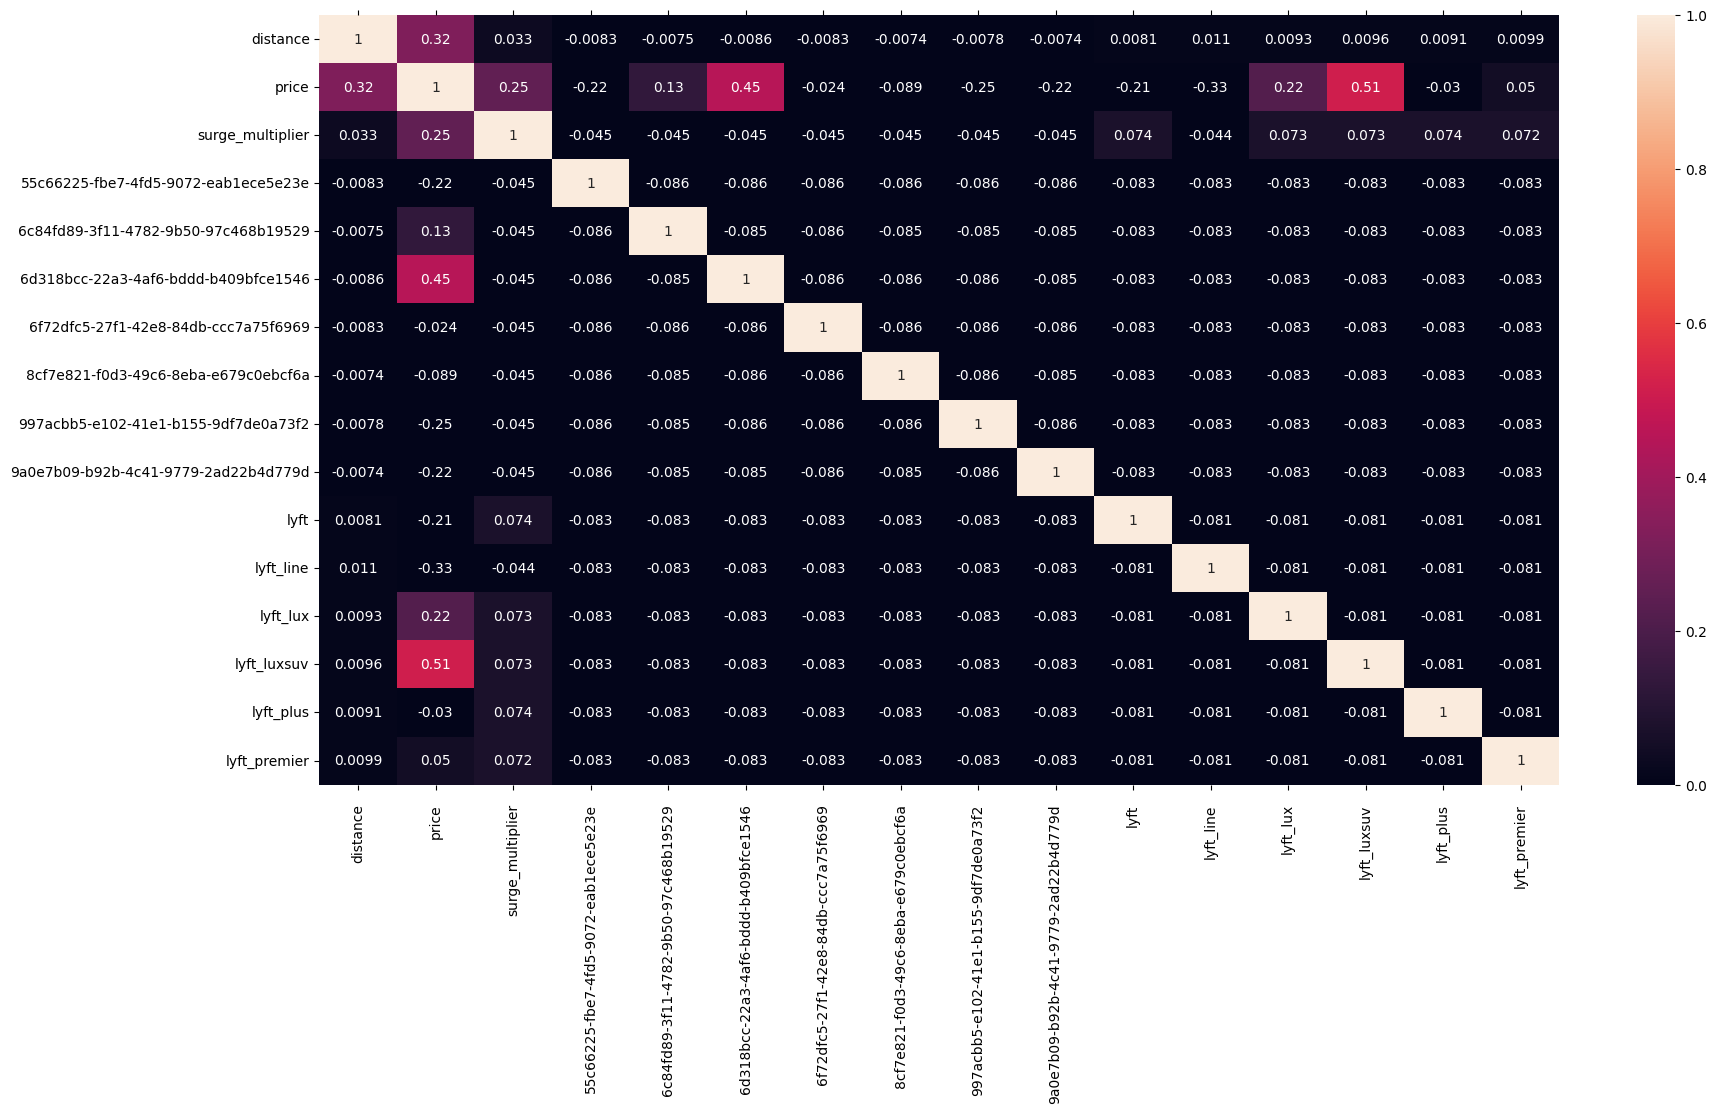

In [44]:
# Checking the Correlation using the Correlation heatmap

corr = df_eda_cleaned.corr()

plt.figure(figsize=(20,10))
corr_heat = sns.heatmap(corr, annot=True, vmin=0, vmax=1)
corr_heat.tick_params(axis='x', which='both', pad=10, labelrotation=90, top=True)
plt.show()

Numerical Scaling  

In [45]:
# Calling the StandardScaler for Scaling
num_col = ['distance']
scaler = StandardScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(df_eda_cleaned[num_col]))
num_scaled.columns = num_col

df_eda_cleaned.drop(num_col, axis=1, inplace=True)
df_eda_cleaned = pd.concat([df_eda_cleaned, num_scaled], axis =1)

df_eda_cleaned.head()

,price,surge_multiplier,55c66225-fbe7-4fd5-9072-eab1ece5e23e,6c84fd89-3f11-4782-9b50-97c468b19529,6d318bcc-22a3-4af6-bddd-b409bfce1546,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,997acbb5-e102-41e1-b155-9df7de0a73f2,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,lyft,lyft_line,lyft_lux,lyft_luxsuv,lyft_plus,lyft_premier,distance
0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.694560
1,26.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.115035
2,22.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.863506
3,13.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.718541
4,10.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.198081


### Preprocessing Summary

1. In **price** column, the missing value is handled by filling the missing value with its median
2. In **distance** and **price** columns are handled on the outlier-wise
3. Ordinal Encoding on the **surge_multiplier**
4. One Hot Encoding on the **product_id**
5. Numerical Scaling on the **distance** column

Processing the Test Data

In [46]:
# Merging the Test Dataset
testing = pd.concat([X_test, y_test], axis=1)
testing.head()

,product_id,distance,surge_multiplier,price
93859,lyft_plus,0.73,1.0,11.0
368642,lyft_premier,1.53,1.5,19.5
485890,lyft_lux,3.06,1.0,26.0
588749,lyft_luxsuv,1.48,1.0,27.5
139941,lyft,2.32,1.0,9.0


In [47]:
num_target = ['distance','price']
num_col = ['distance']
cat_col = ['product_id','surge_multiplier']

print(num_target)
print(num_col)
print(cat_col)

['distance', 'price']
['distance']
['product_id', 'surge_multiplier']


In [48]:
# Checking the missing value within the test dataset
testing.isna().sum()

product_id              0
distance                0
surge_multiplier        0
price               11078
dtype: int64

Because this is the test dataset, we will drop the missing value instead of impute the value. This strategy will overcome the possibility of data leakage from the test data

In [49]:
# Dropping the missing value in the price column
testing.dropna(subset=['price'], inplace=True)

testing.isna().sum()

product_id          0
distance            0
surge_multiplier    0
price               0
dtype: int64

In [50]:
# Checking for the Outlier Data in price column
outlier_detect(testing,'price',1.5)

Skewness level : 1.0376988594524912
Total data : 127537
Data considered as outlier : 1110
Percentage considered as outlier : 0.8703356672965493


(42.75, -11.25)

Because this is the test dataset, we will drop the all the outlier value within the test dataset.

In [51]:
# Trimming the outlier value from the price Column
testing = testing[(testing['price'] <= 42.75 ) & (testing['price'] >= -11.25)]

In [52]:
# Checking for the Outlier Data in distance column
outlier_detect(testing,'distance',1.5)

Skewness level : 0.7789215732162053
Total data : 126427
Data considered as outlier : 1432
Percentage considered as outlier : 1.1326694456089283


(5.345, -1.1749999999999998)

In [53]:
# Trimming the outlier value from the distance Column
testing = testing[(testing['distance'] <= 5.345 ) & (testing['distance'] >= -1.1749999999999998)]

### Handling Categorical Features Test Data

In [54]:
# Ordinal Encoding to Testing Data

cat_ord_test = pd.DataFrame(ord.transform(testing[['surge_multiplier']]))
cat_ord_test.columns = ['surge_multiplier']

review_test = pd.concat([testing[['surge_multiplier']].reset_index(drop=True), cat_ord_test], axis=1)
review_test

,surge_multiplier,surge_multiplier
0,1.0,0.0
1,1.5,2.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
124990,1.0,0.0
124991,1.0,0.0
124992,1.0,0.0
124993,1.0,0.0


In [55]:
# One Hot Encoder to Testing Data

cat_ohe = pd.DataFrame(ohe_enc.transform(testing[['product_id']]))
cat_ohe.columns = ohe_enc.categories_[0]

review = pd.concat([testing[['product_id']].reset_index(drop=True), cat_ohe], axis=1)
review

,product_id,55c66225-fbe7-4fd5-9072-eab1ece5e23e,6c84fd89-3f11-4782-9b50-97c468b19529,6d318bcc-22a3-4af6-bddd-b409bfce1546,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,997acbb5-e102-41e1-b155-9df7de0a73f2,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,lyft,lyft_line,lyft_lux,lyft_luxsuv,lyft_plus,lyft_premier
0,lyft_plus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,lyft_premier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,lyft_lux,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,lyft_luxsuv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,lyft,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124990,lyft_lux,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
124991,lyft_premier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
124992,lyft_plus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
124993,lyft_line,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
# Merging the test dataset with the ordinal and ohe result
testing_cleaned = pd.concat([testing[num_target].reset_index(drop=True), cat_ord_test, cat_ohe], axis=1)
testing_cleaned.head()

,distance,price,surge_multiplier,55c66225-fbe7-4fd5-9072-eab1ece5e23e,6c84fd89-3f11-4782-9b50-97c468b19529,6d318bcc-22a3-4af6-bddd-b409bfce1546,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,997acbb5-e102-41e1-b155-9df7de0a73f2,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,lyft,lyft_line,lyft_lux,lyft_luxsuv,lyft_plus,lyft_premier
0,0.73,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.53,19.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.06,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.48,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.32,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Numerical Scaling
num_col = ['distance']

num_scaled = pd.DataFrame(scaler.transform(testing_cleaned[num_col]))
num_scaled.columns = num_col

testing_cleaned.drop(num_col, axis=1, inplace=True)
testing_cleaned = pd.concat([testing_cleaned, num_scaled], axis =1)

testing_cleaned.head()

,price,surge_multiplier,55c66225-fbe7-4fd5-9072-eab1ece5e23e,6c84fd89-3f11-4782-9b50-97c468b19529,6d318bcc-22a3-4af6-bddd-b409bfce1546,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,997acbb5-e102-41e1-b155-9df7de0a73f2,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,lyft,lyft_line,lyft_lux,lyft_luxsuv,lyft_plus,lyft_premier,distance
0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.340587
1,19.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.580555
2,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.873006
3,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.628057
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.169976


In [58]:
X_train = df_eda_cleaned.drop('price', axis = 1).copy()
y_train = df_eda_cleaned['price']

X_test = testing_cleaned[X_train.columns.tolist()]
y_test = testing_cleaned['price']

for i in [X_train, y_train, X_test, y_test]:
    print(i.shape)

(547842, 15)
(547842,)
(124995, 15)
(124995,)


In [59]:
X_train.head()

,surge_multiplier,55c66225-fbe7-4fd5-9072-eab1ece5e23e,6c84fd89-3f11-4782-9b50-97c468b19529,6d318bcc-22a3-4af6-bddd-b409bfce1546,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,997acbb5-e102-41e1-b155-9df7de0a73f2,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,lyft,lyft_line,lyft_lux,lyft_luxsuv,lyft_plus,lyft_premier,distance
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.694560
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.115035
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.863506
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.718541
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.198081


## Model Building

Linear Regression

In [60]:
# Linear Regression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

pred_train = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

In [61]:
print('MAE train = ', mean_absolute_error(y_train, pred_train))
print('MAE test = ', mean_absolute_error(y_test, pred_test))

print('MSE train = ', mean_squared_error(y_train, pred_train))
print('MSE test = ', mean_squared_error(y_test, pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, pred_test)))

print('r2score train = ', r2_score(y_train, pred_train))
print('r2score test = ', r2_score(y_test, pred_test))

print('mape train = ', mean_absolute_percentage_error(y_train, pred_train))
print('mape test = ', mean_absolute_percentage_error(y_test, pred_test))


MAE train =  1.777402224561423
MAE test =  1.6593629267793775
MSE train =  6.130177048932006
MSE test =  4.997399460013062
RMSE train =  2.475919435064882
RMSE test =  2.235486403450726
r2score train =  0.9223704239578906
r2score test =  0.9346164098596192
mape train =  0.13272986334391146
mape test =  0.12781345134126837


# Conclusion for the Model 
From the result above, we could see that based on the MAE and RMSE test, both yielded only a thin margin difference between the result in train and test. Furthermore, we could check the R2score that is around 92% for both train and test dataset, which we may conclude that the model is a decent model.

This result also represent the high effect of the feature has been decided, which are : product_id, distance, and surge_multiplier

# Model Save

In [62]:
# Save the Files

import json


with open('C:\Reyesgebi\Hacktiv8\Fase 1\Milestone\p1-ftds004-hck-lc1-reyesgebi\LinearRegression.pkl', 'wb') as file_1:
  joblib.dump(lin_reg, file_1)

with open('C:\Reyesgebi\Hacktiv8\Fase 1\Milestone\p1-ftds004-hck-lc1-reyesgebi\scaling_mod.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('C:\Reyesgebi\Hacktiv8\Fase 1\Milestone\p1-ftds004-hck-lc1-reyesgebi\ordinal_mod.pkl', 'wb') as file_3:
  joblib.dump(ord, file_3)

with open('C:\Reyesgebi\Hacktiv8\Fase 1\Milestone\p1-ftds004-hck-lc1-reyesgebi\OHE_mod.pkl', 'wb') as file_4:
  joblib.dump(ohe_enc, file_4)

with open('C:/Reyesgebi/Hacktiv8/Fase 1/Milestone/p1-ftds004-hck-lc1-reyesgebi/numeric_features.txt', 'w') as file_5:
    json.dump(num_col, file_5)

with open('C:/Reyesgebi/Hacktiv8/Fase 1/Milestone/p1-ftds004-hck-lc1-reyesgebi/categoric_features.txt', 'w') as file_6:
    json.dump(cat_col, file_6)


In [63]:
# Yielding the intercept and slope
print(f'Intercept : {lin_reg.intercept_}')
print(f'Slope : {lin_reg.coef_}')

Intercept : -34473623.4640769
Slope : [4.65340669e+00 3.44736332e+07 3.44736438e+07 3.44736535e+07
 3.44736390e+07 3.44736370e+07 3.44736322e+07 3.44736332e+07
 3.44736323e+07 3.44736294e+07 3.44736457e+07 3.44736550e+07
 3.44736379e+07 3.44736404e+07 2.77711505e+00]


Intercept : Represent the value of the Y variable when the independent variable(x) is set to 0

Slope : Change of the dependent value (Y) made per unit change in Independent Variable (x)